# Assignment 2

# Crime data analysis

## 1. Introduction

Vancouver is located in the province of Canada's largest province, B.C. This city is often considered to be one of the best places to live in the world. Is this truly a safe place to live? I feel this is a safe place to live since I have lived in Vancouver for four years and experience very few numbers of crimes. To answer that question We will be analyzing crime data in Vancouver between 2013-2019.

## 2.Data

The source of the data are from https://www.kaggle.com/agilesifaka/vancouver-crime-report

The data has 10 columns (categories):

* TYPE: Types of crime
* YEAR: Recorded year
* MONTH: Recorded month
* DAY: Recorded day
* HOUR: Recorded hour
* MINUTE: Recorded minute
* HUNDRED_BLOCK: Recorded block
* NEIGHBOURHOOD: Recorded neighborhood
* X: GPS longtitude
* Y: GPS latitude

An example of the first five rows of the data：

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
import datetime 
%matplotlib inline
crime_data = pd.read_csv('crime_records.csv')
crime_data.head()

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
0,Break and Enter Commercial,2012,12,14,8,52,NaN,Oakridge,491285.000000,5.453433e+06
1,Break and Enter Commercial,2019,3,7,2,6,10XX SITKA SQ,Fairview,490612.964805,5.457110e+06
2,Break and Enter Commercial,2019,8,27,4,12,10XX ALBERNI ST,West End,491007.779775,5.459174e+06
3,Break and Enter Commercial,2014,8,8,5,13,10XX ALBERNI ST,West End,491015.943352,5.459166e+06
4,Break and Enter Commercial,2005,11,14,3,9,10XX ALBERNI ST,West End,491021.385727,5.459161e+06


In [2]:
print("There are "+ str(crime_data.shape[1]) + " columns and " + str(crime_data.shape[0]) + " rows of data.")

There are 10 columns and 624038 rows of data.


## 3. Missing data
* Do we have missing values?
* Which category has the most missing data?

### 3.1 Numbers of missing data in each categories

In [3]:
crime_data.isnull().sum()

TYPE                 0
YEAR                 0
MONTH                0
DAY                  0
HOUR                 0
MINUTE               0
HUNDRED_BLOCK       13
NEIGHBOURHOOD    64962
X                  120
Y                  120
dtype: int64

### 3.2 Heat map of the missing data:

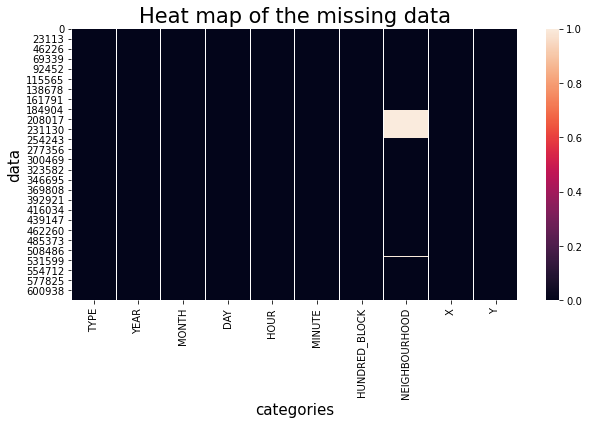

In [4]:
plt.figure(figsize=(10, 5))
# color map of the missing data
sns.heatmap(crime_data.isnull())
plt.xlabel('categories',fontsize=15)
plt.ylabel('data',fontsize=15)
plt.title('Heat map of the missing data',fontsize=21)
plt.show()

* We see that we don't have any type of crime or time missing, we are only missing some of the location of the crime.
* We will not be dealing with missing data in our first part of the analysis since we are only using data of recorded crime time and types of crime.
* The major missing data is the neighbourhoods where the crime was recorded.

## 4. Number of crime happend each year
* Which year has the highest number of crimes?
* Are crime numbers decreasing or increasing?
* What is the average number of crimes that occur in Vancouver each year?
* Since the Olympic Games were held in 2010 in Vancouver, has this event had a positive or negative effect on crime numbers in Vancouver?

### 4.1 Bar graph and line graph of number of crimes  each year

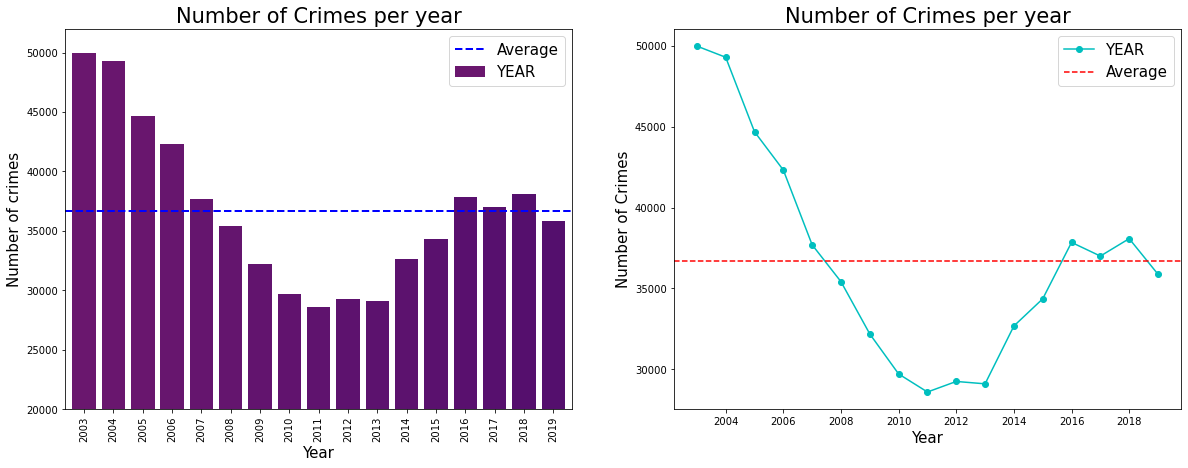

In [14]:
fig1 = plt.figure(figsize=(20,7)) 
Count_year=crime_data['YEAR'].value_counts(sort=False)
# Calcuate the average number of crime happend each year
mean = Count_year.mean()
# Color of the bar
color = cm.inferno_r(np.linspace(.7, .8, 30))
fig1.add_subplot(121)
Count_year.plot(kind='bar',width=0.8,color = color)
#The average line
plt.axhline(mean, color='blue', linewidth=2,linestyle='--',label='Average')
plt.legend(fontsize=15)
plt.title('Number of Crimes per year',fontsize=21)
plt.ylim(20000, 52000)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Number of crimes',fontsize=15)
fig1.add_subplot(122)
Count_year.plot.line(linestyle='-', marker='o',color='c')
#The average line
plt.axhline(mean, color='r', linestyle='--',label='Average')
plt.legend(fontsize=15)
plt.title('Number of Crimes per year',fontsize=21)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Number of Crimes',fontsize=15)
plt.show()

In [16]:
print ("The average number of crimes happend in vancouver is "+ str(round(mean,2)) + " cases.")
print ("Year "+ str(Count_year.idxmax()) + " have the highest crime casese : "+ str(Count_year.max())+ " cases.")
print ("Year "+ str(Count_year.idxmin()) + " have the lowest crime casese : "+ str(Count_year.min())+ " cases.")

The average number of crimes happend in vancouver is 36708.12 cases.
Year 2003 have the highest crime casese : 49993 cases.
Year 2011 have the lowest crime casese : 28587 cases.


* The number of criminal cases dropped consistently from the highest number of 49993 cases to 28587 cases between 2003 and 2011.
* The Olympic Winter Games had an obvious positive effect on the safety of the region because of the number of crime cases that were very low from 2010 to 2013.

## 5. Types of crime 
* What was the major crime type happend in vancouver?
* Was this type always the major crime type in the past seven years?
* Can we conclude that police have done a very good job of investigating all types of crime in the past seven years based on the statistics shown?

### 5.1 Pie graph of different types of crime 

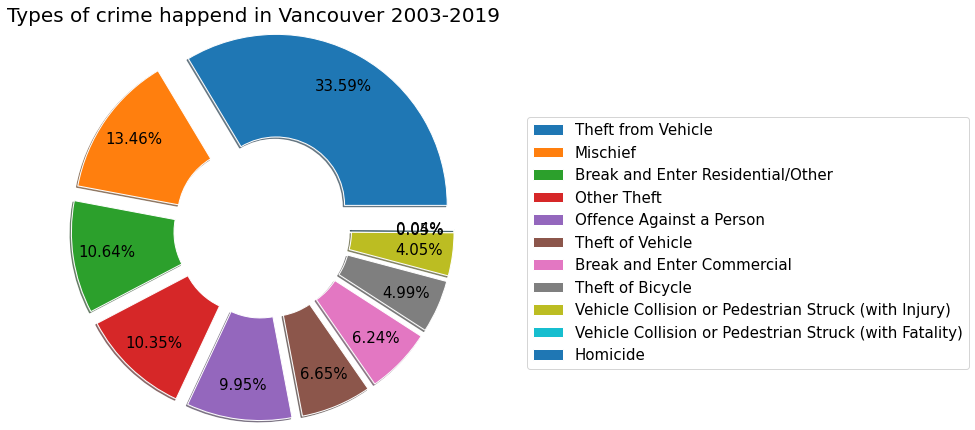

In [17]:
fig2 = plt.figure(figsize=(10,5)) 
explode = (0.4, 0.3, 0.3, 0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3)
fig2.suptitle('Types of crime happend in Vancouver 2003-2019', fontsize=20)
fig2.subplots_adjust(top=0.6)
labels = crime_data['TYPE'].value_counts().index.tolist()
pie=plt.pie(crime_data['TYPE'].value_counts(),radius=2.5 ,autopct='%.2f%%',pctdistance=0.8,explode=explode
        ,textprops={'fontsize': 15}, shadow=True ,wedgeprops=dict(width=1.5, edgecolor='w'))
plt.legend(pie[0],labels, bbox_to_anchor=(2,1.2), fontsize=15)
plt.show()

* Theft from Vehicles is the most common type of crime event, making up 33.6% of all crime types in Vancouver.
* The top three most frequent criminal cases that occurred in Vancouver were Theft from Vehicle, Mischief and Break and Enter Residential/Other (2003-2009).

### 5.2 Line graph of different types of crime

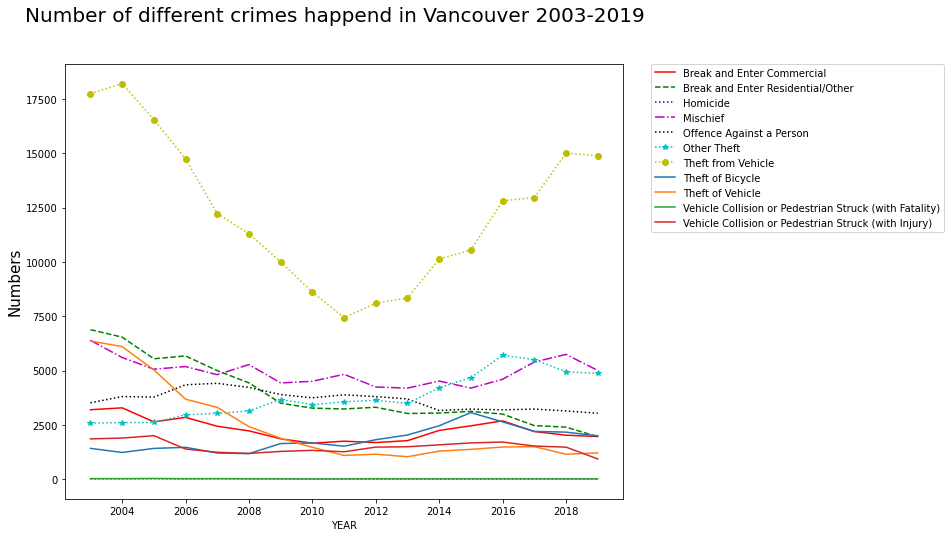

In [18]:
crime_data.groupby('YEAR')['TYPE'].value_counts().unstack().plot(style=  ['r-','g--','b:','m-.','k:','c:*','y:o'],figsize=(10,8))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.suptitle('Number of different crimes happend in Vancouver 2003-2019', fontsize=20)
plt.ylabel('Numbers',fontsize=15)
plt.show()

*  Theft from Vehicles is consistently the highest recorded crime occurrence in Vancouver. Although the number dropped significantly from 2004 to 2011, it then went back up again in the following years.
* Break and Enter Commercial and Theft of Vehicles were the two most frequent criminal cases in 2003 but their number has consistently decreased and in recent years there has been a low number of cases.
* Other theft cases increas hugely and become one of the major event in recent years.
* We feel that police did a very good job on Break and Enter Residential/Other and Break and Enter Commercial cases but they need to focus more on Other Theft cases as well as Theft from Vehicle cases and Mischief/Theft cases

# 6. Time of the crime
* Is crime seasonal in vancouver?
* Was there an obvious pattern of criminals committing crimes？

### 6.1 Heatmap of number of crimes happend each month

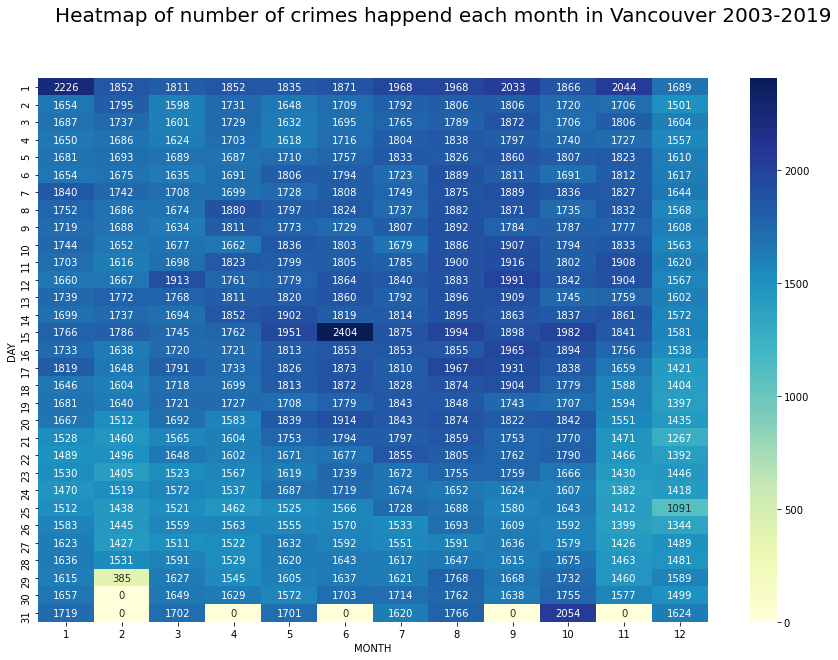

In [19]:
fig3 = plt.figure(figsize=(15,10)) 
sns.heatmap(crime_data.groupby(['DAY', 'MONTH']).size().unstack(fill_value=0), annot=True, fmt='d',cmap="YlGnBu")
fig3.suptitle('Heatmap of number of crimes happend each month in Vancouver 2003-2019', fontsize=20)
plt.show()

* Although Feburary appears to have the lowest number of crimal cases on the graph but considered there were 28 or 29 days in Feburary we would conclude that December is the most safe month.
* Expect the rare data (February 29th which only happens every four years), Christmas Day(December 25th) is the safest day of the year.
* We feel that the crime is seasonal in Vancouver, since most cases occur in summer (June to August). The number of criminal cases dropped significantly in the winter (December to February) compared with the rest of the year. 

### 6.2 Time pattern of  the tops three typs of crimes
* We will try to find the Time pattern of the tops three typs of crimes (Theft from Vehicle, Mischief and Break and Enter Residential/Other).
* To help us analyze the data, we have created two new columns, one is the recorded date of the crime by combining the data from the column YEAR , MONTH and DAY, and the other one is the DAYS_OF_WEEK when the crime was recorded. The first five rows of the data are shown below:

In [20]:
# Create the date column in yy-mm-dd format
Date_data = pd.to_datetime(dict(year=crime_data.YEAR, month=crime_data.MONTH, day=crime_data.DAY))
crime_data['DATE'] = Date_data
# Get the days of week from the dates
crime_data['DAYS_OF_WEEK'] = crime_data['DATE'].dt.day_name()
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
crime_data['DAYS_OF_WEEK'] = pd.Categorical(crime_data['DAYS_OF_WEEK'], categories=days, ordered=True)
crime_data.head()

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,DATE,DAYS_OF_WEEK
0,Break and Enter Commercial,2012,12,14,8,52,NaN,Oakridge,491285.000000,5.453433e+06,2012-12-14,Friday
1,Break and Enter Commercial,2019,3,7,2,6,10XX SITKA SQ,Fairview,490612.964805,5.457110e+06,2019-03-07,Thursday
2,Break and Enter Commercial,2019,8,27,4,12,10XX ALBERNI ST,West End,491007.779775,5.459174e+06,2019-08-27,Tuesday
3,Break and Enter Commercial,2014,8,8,5,13,10XX ALBERNI ST,West End,491015.943352,5.459166e+06,2014-08-08,Friday
4,Break and Enter Commercial,2005,11,14,3,9,10XX ALBERNI ST,West End,491021.385727,5.459161e+06,2005-11-14,Monday


### 6.3 Time pattern of  Theft from Vehicle

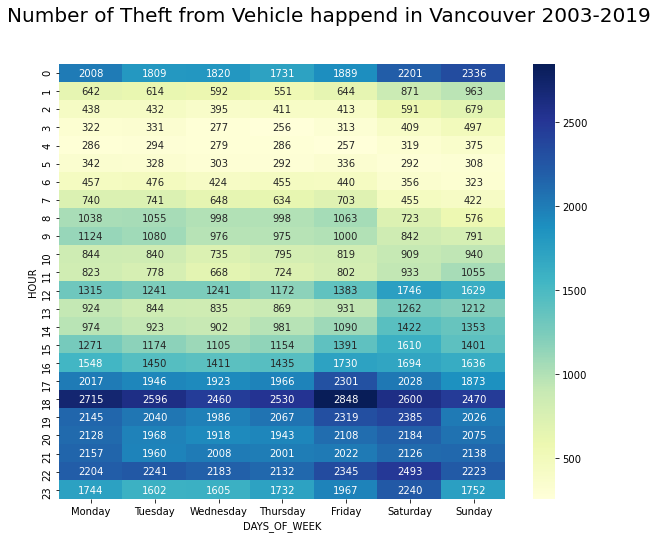

In [21]:
fig4 = plt.figure(figsize=(10,8))
Vehicle_data = crime_data.loc[crime_data['TYPE'] == 'Theft from Vehicle'] 
sns.heatmap(Vehicle_data.groupby(['HOUR', 'DAYS_OF_WEEK']).size().unstack(fill_value=0), annot=True, fmt='d',cmap="YlGnBu")
fig4.suptitle('Number of Theft from Vehicle happend in Vancouver 2003-2019', fontsize=20)
plt.show()

* Theft from Vehicle tend to happen more often in the weekend than the weekdays
* Most Theft from Vehicles occurs in the afternoon. (5 p.m to 10 p.m) during the weekdays, and 12 p.m to 12 a.m during the weekends.
* 6 p.m. and 12 p.m are the peak hours where this type of crime occurs.
* 8 a.m and 9 a.m are the other peak hours during the weekdays.

### 6.4 Time pattern of  Break and Enter Residential/Other 

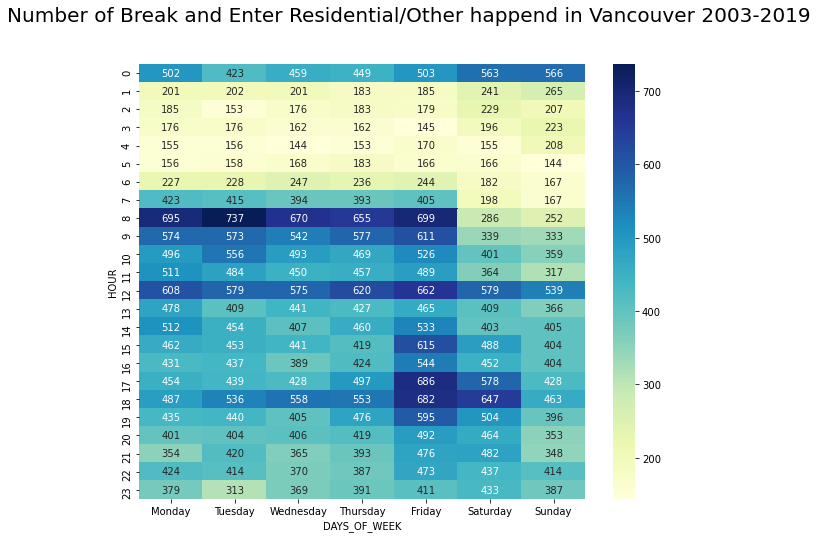

In [22]:
fig5= plt.figure(figsize=(10,8))
Break_data = crime_data.loc[crime_data['TYPE'] == 'Break and Enter Residential/Other'] 
sns.heatmap(Break_data.groupby(['HOUR', 'DAYS_OF_WEEK']).size().unstack(fill_value=0), annot=True, fmt='d',cmap="YlGnBu")
fig5.suptitle('Number of Break and Enter Residential/Other happend in Vancouver 2003-2019', fontsize=20)
plt.show()

* Break and Enter Residential/Other tend to happen more often during the week than the weekend.
* This type of crime is most likely to happen on a Friday during the week.
* The time that people go to work (8 a.m) is the peak hour where this type of crime occurs.

### 6.5 Time pattern of  Mischief

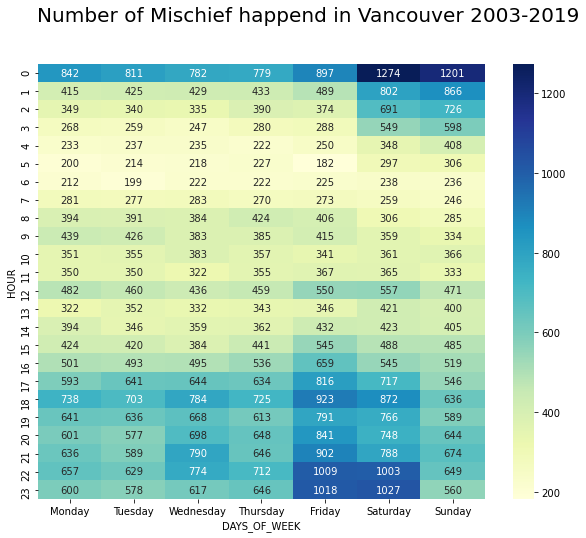

In [23]:
fig6 = plt.figure(figsize=(10,8))
Mischief_data = crime_data.loc[crime_data['TYPE'] == 'Mischief'] 
sns.heatmap(Mischief_data.groupby(['HOUR', 'DAYS_OF_WEEK']).size().unstack(fill_value=0), annot=True, fmt='d',cmap="YlGnBu")
fig6.suptitle('Number of Mischief happend in Vancouver 2003-2019', fontsize=20)
plt.show()

* Mischief is most likely to happend in Fraday and Saturday at night (10 p.m to 0 a.m)
* The midnight(0 a.m) is the peak hour in the weekends when this type of crime occurs.

# 7. Region of the crime
* Is crime regional in Vancouver?
* What regions are the most dangerous that police need to primarily focus on?

### 7.1 Rearrange the data
We know from the beginning that a large portion of neighborhood data is missing, so we are going to drop the missing data to help us analyze the location of the crime

* How many neighbourhoods are there in Vancouver?

In [24]:
#drop the missing data
crime_data = crime_data.dropna()
print("There are "+ str(len(crime_data['NEIGHBOURHOOD'].unique())) + " neighbourhood in Vancouver.")

There are 24 neighbourhood in Vancouver.


Since there are a lot of neighbourhoods in Vancouver, we are going to take the top five neighbourhoods where most crime is recorded and combine the rest neighbourhoods into Other_Neighbourhood. The data after rearranging them is shown below:

In [29]:
# Create the new data of the top five
Ne_five = crime_data['NEIGHBOURHOOD'].value_counts()[0:5].rename_axis('Neighbourhood').reset_index(name='Crime counts').set_index('Neighbourhood')
# Calcute the number of crimes happen in other neighbourhood
Restsum_ne = sum(crime_data['NEIGHBOURHOOD'].value_counts()[5:,])
Rest_ne = pd.DataFrame({'Neighbourhood':['Other_Neighbourhood'], 'Crime counts':[Restsum_ne]}).set_index('Neighbourhood') 
Ne_five = Ne_five.append(Rest_ne) 
Ne_five

,Crime counts
Neighbourhood,
Central Business District,137511
West End,48722
Fairview,36723
Mount Pleasant,36376
Grandview-Woodland,31599
Other_Neighbourhood,268132


### 7.2 Top five dangourse neighbourhood in Vancouver

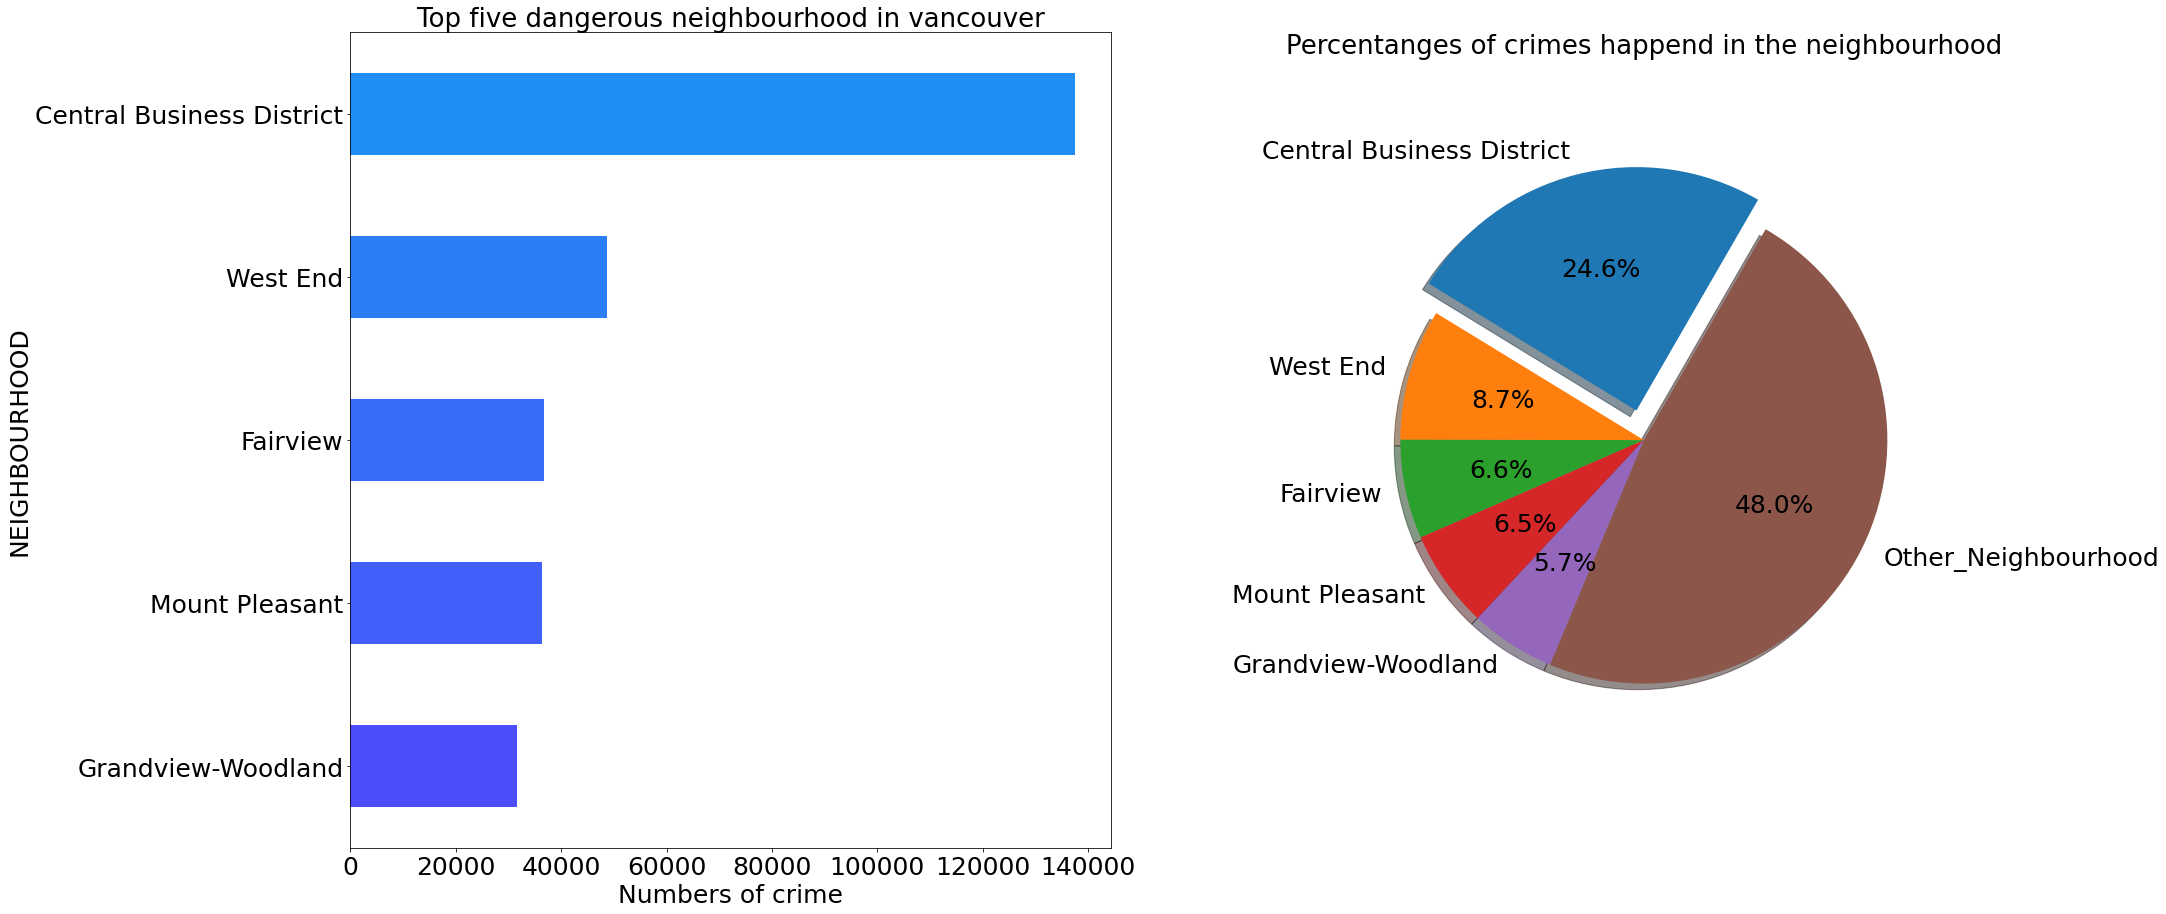

In [30]:
fig4 = plt.figure(figsize=(30, 15)) 
plt.axis('off')
color = cm.rainbow(np.linspace(0.1,0.3, 10))
fig4.add_subplot(121)
crime_data["NEIGHBOURHOOD"].value_counts()[0:5].sort_values().plot.barh(color = color,fontsize=25)
plt.title('Top five dangerous neighbourhood in vancouver',fontsize=26)
plt.xlabel('Numbers of crime',fontsize=25)
plt.ylabel('NEIGHBOURHOOD',fontsize=25)
fig4.add_subplot(122)
Ne_five['Crime counts'].plot.pie(autopct='%.1f%%',shadow=True,fontsize=25,radius=0.8,explode = (0.1, 0, 0, 0,0.0,0),startangle=60)
plt.title('Percentanges of crimes happend in the neighbourhood',fontsize=26)
plt.ylabel('')
plt.show()

* The Central Business District is the most dangerous neighbourhood in Vancouver, and almost a quarter of the crimes take place in this neighbourhood.
* We think crime is regional in Vancouver since more than 50 percent of the crime happens in these top five dangerous neighbourhoods.

### 7.3 Rearrange the crime data for the Central Business District
While we know that most crime happens in the Central Business District, let's narrow it down to blocks so that more police can be sent to the block to reduce crime rates.

* How many blocks is there in the Central Business District?

In [31]:
Central_data = crime_data.loc[crime_data['NEIGHBOURHOOD'] == 'Central Business District']
print("There are "+ str(len(Central_data['HUNDRED_BLOCK'].unique())) + " Blocks in Central Business District.")

There are 1447 Blocks in Central Business District.


Blocks are also large, so we use the same previous method to rearrange the data. The new data is shown below:

In [32]:
Central_five = Central_data['HUNDRED_BLOCK'].value_counts()[0:5].rename_axis('Blocks').reset_index(name='Crime counts').set_index('Blocks')
rest_sum = sum(Central_data['HUNDRED_BLOCK'].value_counts()[5:,])
Rest_block = pd.DataFrame({'Blocks':['Other_Block'], 'Crime counts':[rest_sum]}).set_index('Blocks') 
Central_five = Central_five.append(Rest_block) 
Central_five

,Crime counts
Blocks,
7XX GRANVILLE ST,5473
6XX GRANVILLE ST,3382
7XX W GEORGIA ST,3145
3XX ABBOTT ST,2461
5XX W HASTINGS ST,1936
Other_Block,121114


### 7.4 Top five dangourse Blocks in Central Business District

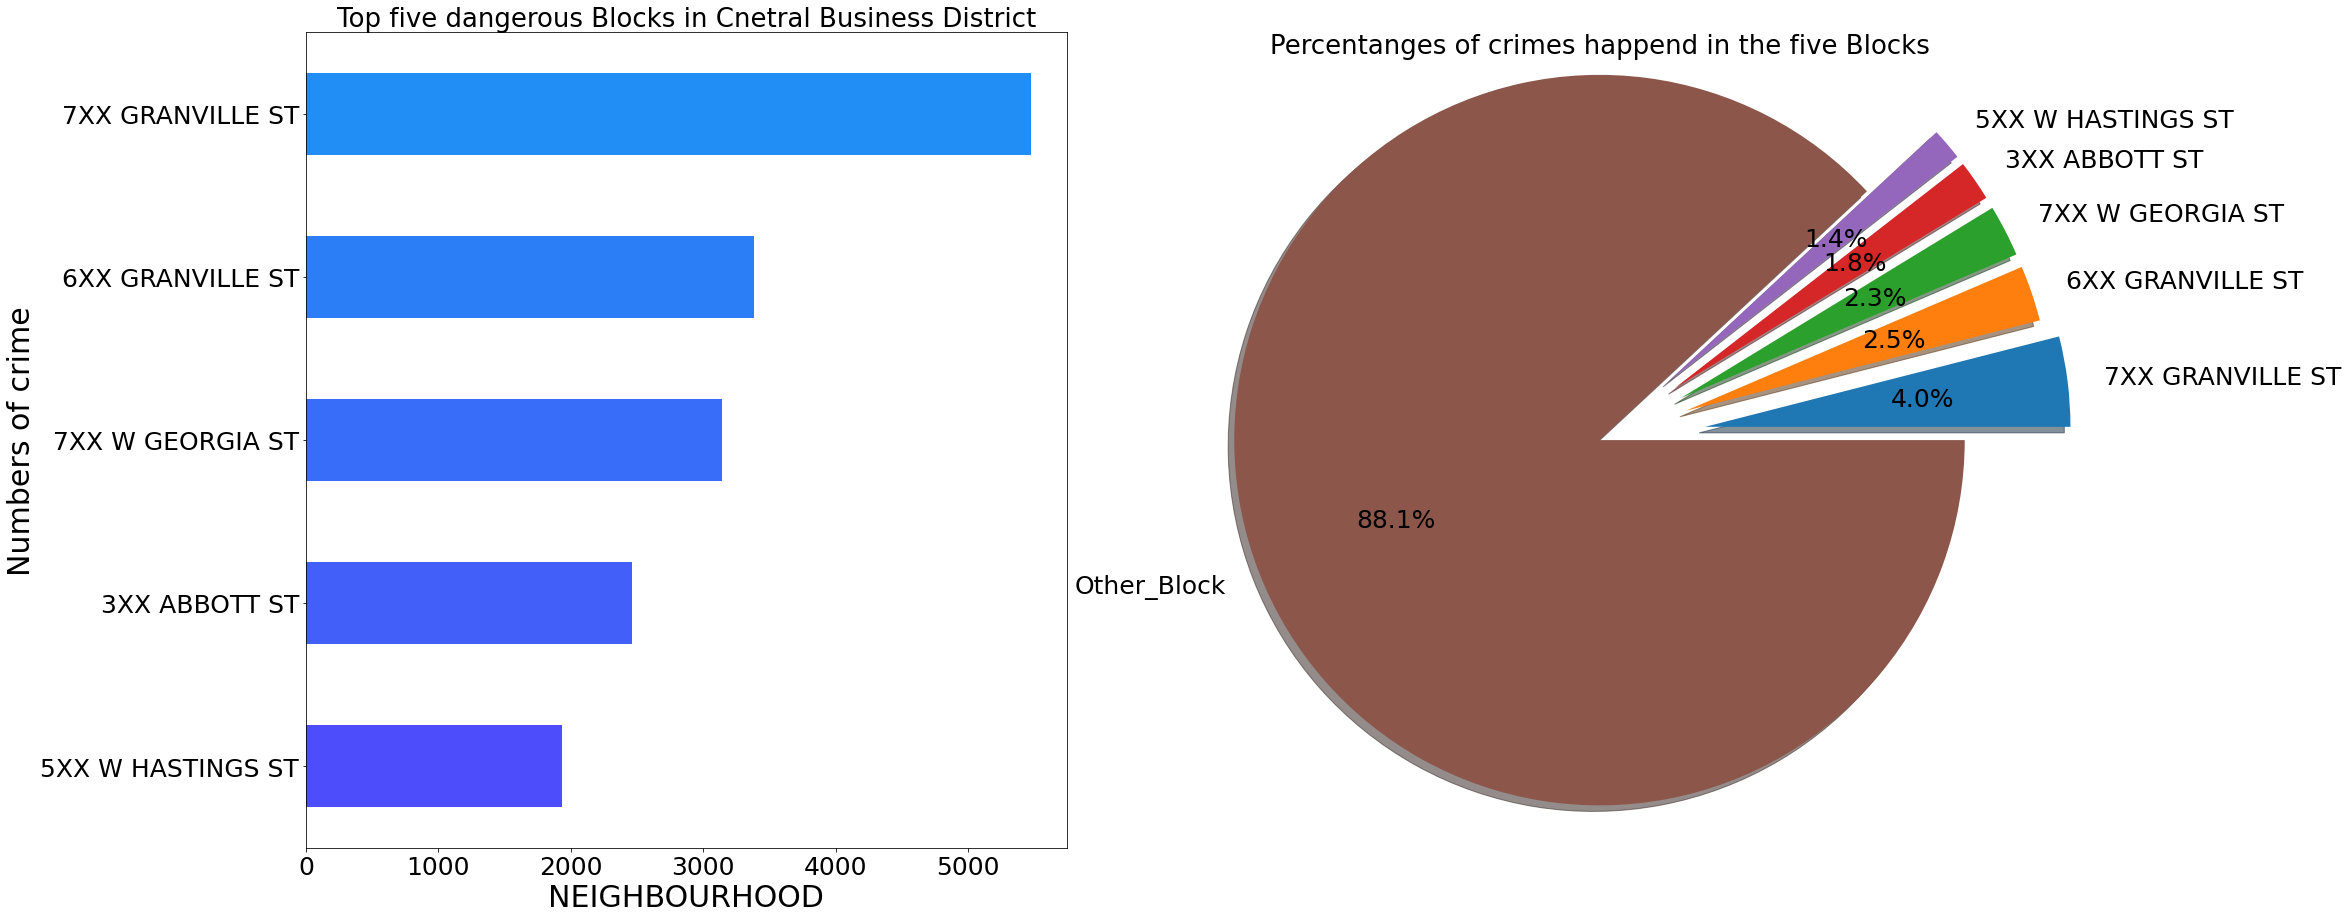

In [33]:
fig5 = plt.figure(figsize=(30, 15))
fig5.add_subplot(121)
# Data of top five dangourse Blocks 
Central_data['HUNDRED_BLOCK'].value_counts()[0:5].sort_values().plot.barh(color= color,fontsize=25)
plt.title('Top five dangerous Blocks in Cnetral Business District',fontsize=26)
plt.xlabel('NEIGHBOURHOOD',fontsize=30)
plt.ylabel('Numbers of crime',fontsize=30)
fig5.add_subplot(122)
Central_five['Crime counts'].plot.pie(autopct='%.1f%%',shadow=True,fontsize=25,radius=1.2,explode = (0.35, 0.3, 0.3, 0.3,0.3,0))
plt.title('Percentanges of crimes happend in the five Blocks',fontsize=26)
plt.ylabel('')
plt.show()

* 7xx Granville Street is the most dangerous Block in the Central Business District, with four percent of all crime in the Central Business District recorded in that block.
* Four percent would be considered a large proportion since there are around fifteen hundred blocks in this neighbourhood.
* Police should patrol this block more frequently.